# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-09-27 12:00:03.934159


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 9/26/20


,9/26/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,7078089,204490,2.89
Brazil,4717991,141406,3.00
India,5992532,94503,1.58
Mexico,726431,76243,10.50
United Kingdom,431817,42060,9.74
Italy,308104,35818,11.63
Peru,794584,32037,4.03


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 9/26/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
43074,US,6977658,2020-09-24,202798.0,914.0,44110.0,43188.571429
43073,US,6933548,2020-09-23,201884.0,1098.0,37630.0,43277.714286
43072,US,6895918,2020-09-22,200786.0,921.0,39034.0,43333.428571
43071,US,6856884,2020-09-21,199865.0,356.0,52070.0,43318.857143
43070,US,6804814,2020-09-20,199509.0,227.0,36695.0,40670.285714
43069,US,6768119,2020-09-19,199282.0,712.0,44186.0,40428.000000
43068,US,6723933,2020-09-18,198570.0,936.0,48595.0,40040.142857


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 9/26/20


,9/26/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,454760,33125.0,7.28
New Jersey,202850,16103.0,7.94
Texas,754311,15707.0,2.08
California,807451,15583.0,1.93
Florida,698682,14022.0,2.01
Massachusetts,130050,9391.0,7.22
Illinois,288773,8832.0,3.06


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 9/26/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1491,California,799516,2020-09-24,15393.0,102.0,3080.0,3497.000000
1490,California,796436,2020-09-23,15291.0,102.0,3371.0,3587.857143
1489,California,793065,2020-09-22,15189.0,133.0,2969.0,3551.571429
1488,California,790096,2020-09-21,15056.0,40.0,3928.0,3566.000000
1487,California,786168,2020-09-20,15016.0,-2.0,2855.0,3491.428571
1486,California,783313,2020-09-19,15018.0,125.0,3822.0,3482.857143
1485,California,779491,2020-09-18,14893.0,89.0,4454.0,3512.285714


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 9/26/20


,9/26/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,266988,6504.0,2.44
Orange,53069,1214.0,2.29
Riverside,58178,1189.0,2.04
San Bernardino,54386,925.0,1.70
San Diego,46331,775.0,1.67
San Joaquin,20194,441.0,2.18
Sacramento,22183,406.0,1.83


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 9/26/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
4728,Los Angeles,264414,2020-09-24,6455.0,32.0,1081.0,1020.428571
4727,Los Angeles,263333,2020-09-23,6423.0,22.0,1200.0,1026.428571
4726,Los Angeles,262133,2020-09-22,6401.0,35.0,687.0,1012.000000
4725,Los Angeles,261446,2020-09-21,6366.0,13.0,649.0,970.000000
4724,Los Angeles,260797,2020-09-20,6353.0,23.0,980.0,973.142857
4723,Los Angeles,259817,2020-09-19,6330.0,0.0,1301.0,948.714286
4722,Los Angeles,258516,2020-09-18,6330.0,6.0,1245.0,921.428571
4721,Los Angeles,257271,2020-09-17,6324.0,21.0,1123.0,892.428571
4720,Los Angeles,256148,2020-09-16,6303.0,30.0,1099.0,898.428571
4719,Los Angeles,255049,2020-09-15,6273.0,42.0,393.0,829.714286



7 day new US cases as of 9/26/20


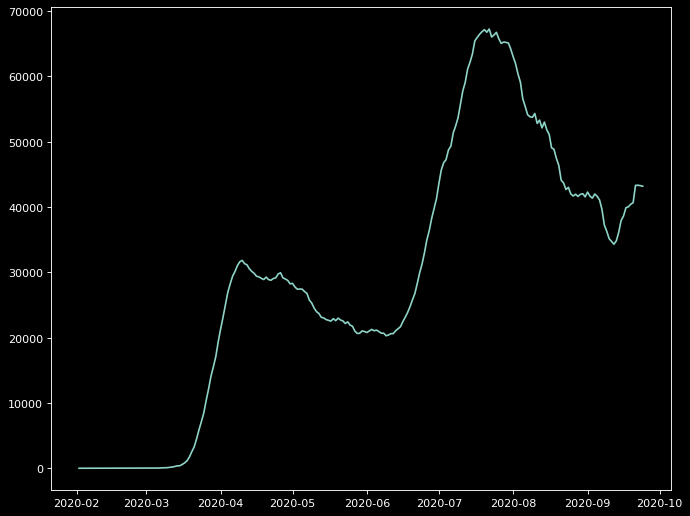

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 9/26/20


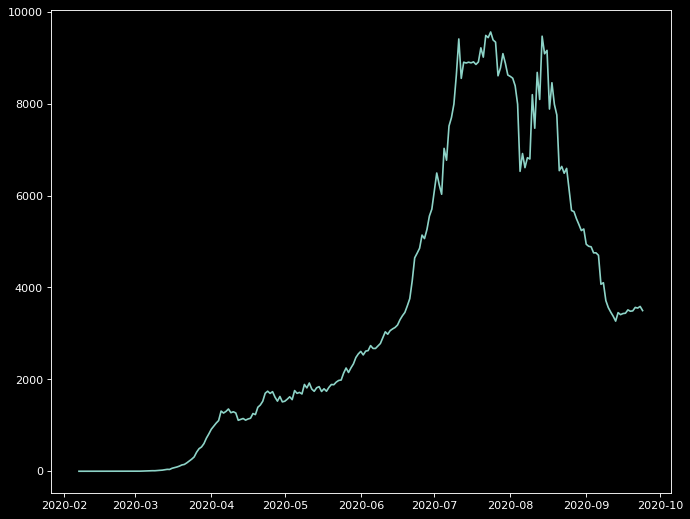

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 9/26/20


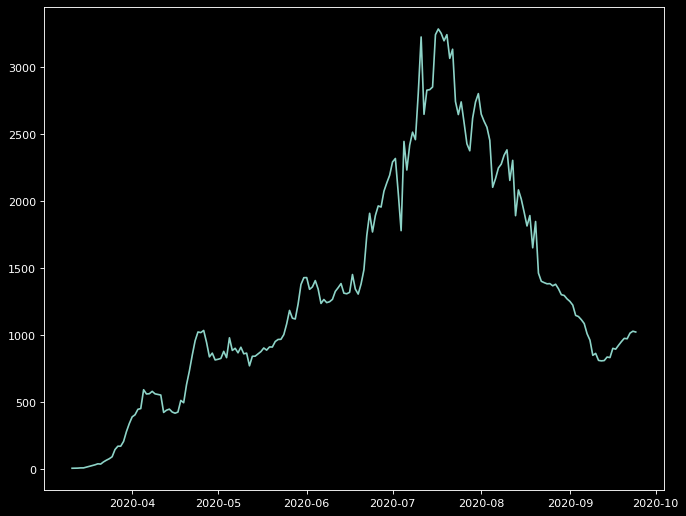

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()